***
### Import required Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# for normalization
from sklearn.preprocessing import StandardScaler

# for PCA 
from sklearn.decomposition import PCA            

%matplotlib inline

In [2]:
# set the max columns to 55 
pd.set_option('display.max_columns',55)                

In [3]:
# Load churn dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D212\churn_clean.csv"
 
df_churn = pd.read_csv(path, index_col=1) 
df_churn.head()   

,CaseOrder,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K409198,1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
S120509,2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
K191035,3,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
D90850,4,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
K662701,5,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Only numerical variables 

df_continuous = df_churn[['Population', 'Income', 'Outage_sec_perweek', 'Lat', 'Lng', 
                          'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
df_continuous.head()

,Population,Income,Outage_sec_perweek,Lat,Lng,Tenure,MonthlyCharge,Bandwidth_GB_Year
Customer_id,,,,,,,,
K409198,38,28561.99,7.978323,56.25100,-133.37571,6.795513,172.455519,904.536110
S120509,10446,21704.77,11.699080,44.32893,-84.24080,1.156681,242.632554,800.982766
K191035,3735,9609.57,10.752800,45.35589,-123.24657,15.754144,159.947583,2054.706961
D90850,13863,18925.23,14.913540,32.96687,-117.24798,17.087227,119.956840,2164.579412
K662701,11352,40074.19,8.147417,29.38012,-95.80673,1.670972,149.948316,271.493436


In [5]:
df_continuous.shape

(10000, 8)

In [6]:
# check for null 
print("Check for Nulls")
print("-"*100)
print(df_continuous.isnull().any())

print("*"*100, '\n')

# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_continuous.isna().any())

print("*"*100)
print("Dataframe Information :", '\n')
print(df_continuous.info())

Check for Nulls
----------------------------------------------------------------------------------------------------
Population            False
Income                False
Outage_sec_perweek    False
Lat                   False
Lng                   False
Tenure                False
MonthlyCharge         False
Bandwidth_GB_Year     False
dtype: bool
**************************************************************************************************** 

Check for Missing Values
----------------------------------------------------------------------------------------------------
Population            False
Income                False
Outage_sec_perweek    False
Lat                   False
Lng                   False
Tenure                False
MonthlyCharge         False
Bandwidth_GB_Year     False
dtype: bool
****************************************************************************************************
Dataframe Information : 

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entr

**No null or missing values present in the dataset.** 

In [7]:
# get the summary
desc_df = df_continuous.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Population,Income,Outage_sec_perweek,Lat,Lng,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,39806.926771,10.001848,38.757567,-90.782536,34.526188,172.624816,3392.341550
std,14432.698671,28199.916702,2.976019,5.437389,15.156142,26.443063,42.943094,2185.294852
min,0.000000,348.670000,0.099747,17.966120,-171.688150,1.000259,79.978860,155.506715
25%,738.000000,19224.717500,8.018214,35.341828,-97.082812,7.917694,139.979239,1236.470827
50%,2910.500000,33170.605000,10.018560,39.395800,-87.918800,35.430507,167.484700,3279.536903
75%,13168.000000,53246.170000,11.969485,42.106908,-80.088745,61.479795,200.734725,5586.141370
max,111850.000000,258900.700000,21.207230,70.640660,-65.667850,71.999280,290.160419,7158.981530
+3_std,53054.658412,124406.676876,18.929906,55.069733,-45.314111,113.855376,301.454099,9948.226107
-3_std,-33541.533612,-44792.823334,1.073791,22.445401,-136.250961,-44.803000,43.795534,-3163.543008


**No Outliers present !** 

### Standardize the data or scale the features 

In [8]:
# Create the object 
scaler = StandardScaler()

# Calsulate the mean and standard deviation 
scaler.fit(df_continuous)
scaled_features = scaler.transform(df_continuous)

In [9]:
scaled_features

array([[-0.67340479, -0.39877774, -0.6799776 , ..., -1.04874621,
        -0.00394256, -1.13848703],
       [ 0.04777153, -0.64195445,  0.57033109, ..., -1.26200116,
         1.6303259 , -1.18587584],
       [-0.41723753, -1.07088496,  0.25234705, ..., -0.7099398 ,
        -0.29522482, -0.61213775],
       ...,
       [-0.64790585,  0.21903654, -1.14619816, ...,  0.48751337,
        -0.06172934,  0.35098358],
       [ 1.78897441, -0.82058767,  0.69561559, ...,  1.38301834,
         1.86300465,  1.40771348],
       [ 0.17138592, -1.09176018,  0.58902829, ...,  1.09012007,
         1.04467151,  1.12816258]])

In [10]:
# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(scaled_features, columns=df_continuous.columns)
df_standardized

,Population,Income,Outage_sec_perweek,Lat,Lng,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.398778,-0.679978,3.217410,-2.810432,-1.048746,-0.003943,-1.138487
1,0.047772,-0.641954,0.570331,1.024691,0.431644,-1.262001,1.630326,-1.185876
2,-0.417238,-1.070885,0.252347,1.213570,-2.142079,-0.709940,-0.295225,-0.612138
3,0.284537,-0.740525,1.650506,-1.065031,-1.746273,-0.659524,-1.226521,-0.561857
4,0.110549,0.009478,-0.623156,-1.724710,-0.331512,-1.242551,-0.528086,-1.428184
...,...,...,...,...,...,...,...,...
9995,-0.631692,0.564456,-0.196888,0.860078,1.187380,1.273401,-0.294484,1.427298
9996,4.670977,-0.201344,-1.095915,-0.402511,0.222073,1.002740,0.811726,1.054194
9997,-0.647906,0.219037,-1.146198,-0.595385,-0.637349,0.487513,-0.061729,0.350984
9998,1.788974,-0.820588,0.695616,-0.952234,0.372813,1.383018,1.863005,1.407713


### Prepared Dataset   

In [11]:
# Extract the clean data in CSV format 
df_standardized.to_csv('Churn_prepared_pca.csv')

### Apply PCA to all the 8 features to explain 100% variance

References - 

WGU Courseware resources - https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=60fa4159-94ba-4f41-9ba8-aea0011f18f9

In [12]:
# Initialize PCA with the number of components you want to keep
pca_all = PCA(n_components=8, random_state=42)

# Apply PCA to the scaled features
pca_result = pca_all.fit_transform(scaled_features)

In [13]:
print (pca_result)

[[-1.64898412 -3.23238311  2.47832134 ... -0.88993663  0.69051945
  -0.06303286]
 [-1.68244871 -0.585104   -1.1139278  ... -0.82821315  0.82338779
  -0.01952657]
 [-0.99397704 -1.46328564  1.62603094 ... -0.11486612 -0.27406975
   0.08249272]
 ...
 [ 0.59328494 -0.14141805  0.59252964 ... -0.74151358 -1.00359611
  -0.09472909]
 [ 2.07249843  1.93368566 -0.7390537  ... -0.91201273  0.6157077
  -0.06440808]
 [ 1.63007834  0.75521151 -1.03603149 ... -0.44910985 -0.22828168
  -0.01807004]]


### Analyze the results

In [14]:
# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8']) 
print(pca_df)                                         

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.648984 -3.232383  2.478321 -1.046360 -0.209725 -0.889937  0.690519   
1    -1.682449 -0.585104 -1.113928 -1.350097  0.178942 -0.828213  0.823388   
2    -0.993977 -1.463286  1.626031 -1.359251 -0.834178 -0.114866 -0.274070   
3    -0.894554  0.722804  1.325888 -1.449700 -0.700235  1.590919 -1.254462   
4    -1.873170  1.296499  0.438623  0.636444 -0.192207 -0.151913 -1.219913   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.885894 -0.889553 -0.800021  1.028606  0.114101  0.368791  0.663999   
9996  1.487331  3.406965  1.342018 -0.455157  0.361667 -1.455822  2.822884   
9997  0.593285 -0.141418  0.592530  0.785682  0.022376 -0.741514 -1.003596   
9998  2.072498  1.933686 -0.739054 -1.707454  0.239993 -0.912013  0.615708   
9999  1.630078  0.755212 -1.036031 -1.047074 -0.502719 -0.449110 -0.228282   

           PC8  
0    -0.063033  
1    -0.019527  
2     0.0824

In [15]:
# PCA loading 
loading = pd.DataFrame(pca_all.components_.T, 
columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8'],
index = df_continuous.columns)

loading 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population,-0.000604,0.665320,0.336944,-0.182356,0.083998,-0.033618,0.634333,0.000301
Income,0.003757,-0.048858,0.098357,0.391906,0.884329,0.228583,0.006679,-0.001252
Outage_sec_perweek,0.005782,0.005868,-0.263581,-0.647220,0.135357,0.701538,-0.032946,0.000023
Lat,-0.023797,-0.722986,0.109063,-0.093413,-0.014524,-0.004450,0.675183,0.001097
Lng,0.007964,0.178276,-0.801422,0.402374,-0.109946,0.107360,0.374643,0.000777
Tenure,0.705614,-0.012402,0.030757,0.026255,-0.029189,0.036239,0.011011,-0.705715
MonthlyCharge,0.040773,-0.011186,-0.390077,-0.472153,0.423596,-0.664505,-0.008049,-0.045371
Bandwidth_GB_Year,0.706943,-0.012540,0.006419,-0.003597,-0.000282,-0.006185,0.008758,0.707039


####  Interpreting Principal Components : 

**PC1:** This principal component is strongly influenced by the "Tenure" and "Bandwidth_GB_Year" variables, as they have high absolute loading values. It suggests that customers with longer tenure and higher bandwidth usage contribute significantly to this component.

**PC2:** This component is mainly influenced by the "Lat", "Lng", and "Population" variables, indicating a relationship between geographic location and population density.

**PC3:** The "Income" variable has a relatively high loading in this component, suggesting that it plays a crucial role in explaining the variation in this component.

**PC4:** The "Income" and "Outage_sec_perweek" variables have notable loadings in this component, indicating a potential relationship between income and service outage duration.

In [16]:
# Calculate eigenvalues
eigenvalues = pca_all.explained_variance_
eigenvalues

array([1.99398015, 1.22780355, 1.04188916, 1.01975125, 0.99649705,
       0.9781073 , 0.73631576, 0.00645586])

In [17]:
# Display the explained variance ratio
explained_variance_ratio = pca_all.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

Explained Variance Ratio: [0.24922259 0.1534601  0.13022312 0.12745616 0.12454967 0.12225119
 0.09203027 0.0008069 ]


### Scree plot using Elbow Rule

Reference - https://www.youtube.com/watch?v=H99JRtDDnvk 

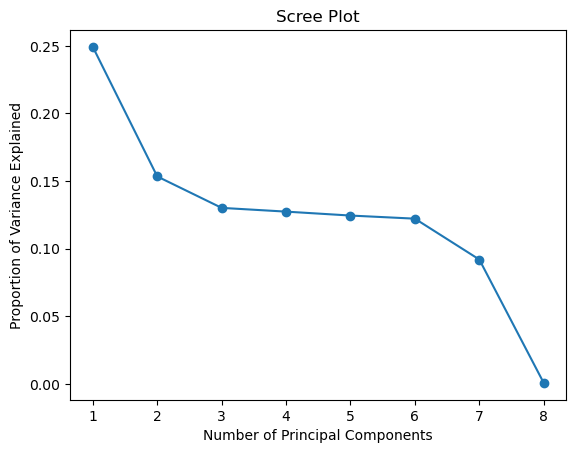

In [18]:
# Step 5: Create a scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

The "elbow" point is the point where the slope of the curve starts to level off so in above graph the 3 PCs can be retain for the analysis. 

In [19]:
print("Variance explained by all 21 principal component = ", sum(explained_variance_ratio * 100))

Variance explained by all 21 principal component =  100.0


In [20]:
explained_variance_ratio * 100

array([24.92225937, 15.3460096 , 13.02231211, 12.74561598, 12.45496748,
       12.22511864,  9.20302664,  0.08069017])

### Capture Variance per principal component for all the PC's

In [21]:
# Display the explained variance for each PC in percentage
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance_ratio * 100:.2f}%")

PC1: 24.92%
PC2: 15.35%
PC3: 13.02%
PC4: 12.75%
PC5: 12.45%
PC6: 12.23%
PC7: 9.20%
PC8: 0.08%


In [22]:
# Calculate the cumulative explained variance in percentage
cumulative_variance = explained_variance_ratio.cumsum() * 100

# Display the cumulative explained variance for each PC
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance:.2f}%")

PC1: 24.92%
PC2: 40.27%
PC3: 53.29%
PC4: 66.04%
PC5: 78.49%
PC6: 90.72%
PC7: 99.92%
PC8: 100.00%


In [23]:
print ("Variance explained by first 2 PC's =",  cumulative_variance[1] )
print ("Variance explained by first 3 PC's =",  cumulative_variance[2] )
print ("Variance explained by first 5 PC's =",  cumulative_variance[4] )
print ("Variance explained by first 6 PC's =",  cumulative_variance[5] )

Variance explained by first 2 PC's = 40.26826897239642
Variance explained by first 3 PC's = 53.2905810873414
Variance explained by first 5 PC's = 78.49116454659173
Variance explained by first 6 PC's = 90.71628318929801


### Apply PCA with 3 component

In [24]:
# Initialize PCA with the number of components you want to keep
pca_3 = PCA(n_components=3, random_state=42)

# Apply PCA to the scaled features
pca3_result = pca_3.fit_transform(scaled_features)

In [25]:
pca3_result

array([[-1.64898412, -3.23238311,  2.47832134],
       [-1.68244871, -0.585104  , -1.1139278 ],
       [-0.99397704, -1.46328564,  1.62603094],
       ...,
       [ 0.59328494, -0.14141805,  0.59252964],
       [ 2.07249843,  1.93368566, -0.7390537 ],
       [ 1.63007834,  0.75521151, -1.03603149]])

In [26]:
# Explained variance ratio
pca_3_explained_variance_ratio = pca_3.explained_variance_ratio_ * 100 
pca_3_explained_variance_ratio

array([24.92225937, 15.3460096 , 13.02231211])

In [27]:
# Cumulative explained variance
pca_3_cumulative_variance = pca_3_explained_variance_ratio.cumsum()
pca_3_cumulative_variance 

array([24.92225937, 40.26826897, 53.29058109])

In [28]:
# Print explained variance ratio for each PC
for i, variance_ratio in enumerate(pca_3_explained_variance_ratio):
    print(f"PC{i+1}: {variance_ratio:.4f}")

PC1: 24.9223
PC2: 15.3460
PC3: 13.0223


In [29]:
# Print cumulative explained variance for each PC
for i, variance in enumerate(pca_3_cumulative_variance ):
    print(f"Cumulative variance PC{i+1}: {variance:.4f}")

Cumulative variance PC1: 24.9223
Cumulative variance PC2: 40.2683
Cumulative variance PC3: 53.2906


In [30]:
# Create a DataFrame with explained variance ratio
var_df = pd.DataFrame(pca_3_explained_variance_ratio.round(2), columns =['Capture Variance Per PC'], 
                      index = ['PC1', 'PC2', 'PC3'])

In [31]:
var_df

,Capture Variance Per PC
PC1,24.92
PC2,15.35
PC3,13.02


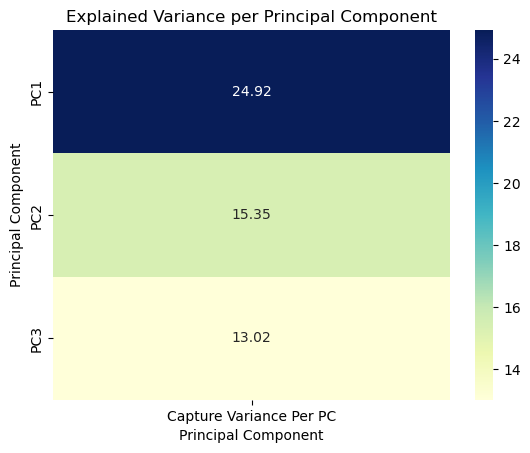

In [32]:
sns.heatmap(var_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.title('Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.show()

### Scatter plot using three principal components against the target variable Churn

In [33]:
pc1 = pca3_result[:,0]

In [34]:
pc2 = pca3_result[:,1]

In [35]:
pc3 = pca3_result[:,2]

In [36]:
# Create a DataFrame with PCs and target variable together
df = pd.DataFrame({'PC1': pc1, 'PC2': pc2, 'PC3': pc3, 'Churn': df_churn['Churn']})

In [37]:
df 

,PC1,PC2,PC3,Churn
Customer_id,,,,
K409198,-1.648984,-3.232383,2.478321,No
S120509,-1.682449,-0.585104,-1.113928,Yes
K191035,-0.993977,-1.463286,1.626031,No
D90850,-0.894554,0.722804,1.325888,No
K662701,-1.873170,1.296499,0.438623,Yes
...,...,...,...,...
M324793,1.885894,-0.889553,-0.800021,No
D861732,1.487331,3.406965,1.342018,No
I243405,0.593285,-0.141418,0.592530,No


In [38]:
# Label encoding
cust_map = {"No": 0, "Yes": 1}         # Defining the mapping 

df['Churn'] = df['Churn'].map(cust_map)

In [39]:
df 

,PC1,PC2,PC3,Churn
Customer_id,,,,
K409198,-1.648984,-3.232383,2.478321,0
S120509,-1.682449,-0.585104,-1.113928,1
K191035,-0.993977,-1.463286,1.626031,0
D90850,-0.894554,0.722804,1.325888,0
K662701,-1.873170,1.296499,0.438623,1
...,...,...,...,...
M324793,1.885894,-0.889553,-0.800021,0
D861732,1.487331,3.406965,1.342018,0
I243405,0.593285,-0.141418,0.592530,0


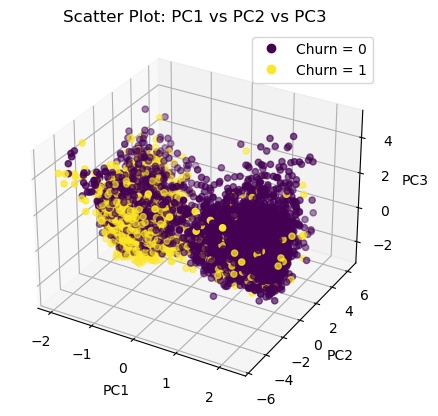

In [40]:
# Step 4: Plot the scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

churn_values = df['Churn'].values
scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=churn_values)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Scatter Plot: PC1 vs PC2 vs PC3')

# Create a legend for the churn values
legend_labels = ['Churn = 0', 'Churn = 1']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()